<a href="https://colab.research.google.com/github/Priti19M/Colour_Wheel/blob/main/Color_wheel_for_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
pip install extcolors  #downloading essential libraries

In [73]:
import extcolors
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [74]:
import matplotlib
matplotlib.__version__

'3.7.1'

In [75]:
def resizer(input_image):
  output_width = 900 # set the output size
  img = Image.open(input_image)
  wpercent = (output_width/float(img.size[0])) #scaling org with as per desiered width
  hsize = int((float(img.size[1])*float(wpercent))) #new height of the img
  img = img.resize((output_width,hsize), Image.ANTIALIAS)

  #save the new resized image
  resize_name = input_image.split('.',1)[0] + '_resize.' + input_image.split('.',1)[1]
  img.save(resize_name)
  return 0


In [76]:
def color_to_df(img):
    img_name= img.split('.',1)[0] + '_resize.' + img.split('.',1)[1]
    colors= extcolors.extract_from_path(img_name, tolerance = 12, limit = 14) #extract dominant colors with limit of 14 i.e 14 colors will be included
    df= pd.DataFrame(columns= ['hex', 'occurence']) #storing hex values and it respective occurences
    for i in range(len(colors[0])):
        df.loc[i]= ['#%02x%02x%02x' % colors[0][i][0],
                    colors[0][i][1]] # convert rgb to hex

    return df


In [77]:
def make_the_wheel(data, img):
    img_name= img.split('.',1)[0] + '_resize.' + img.split('.',1)[1]
    list_color = list(data['hex'])
    list_percent = [int(i) for i in list(data['occurence'])]
    text_c = [c + ' ' + str(round(p*100/sum(list_percent),1))
                +'%' for c, p in zip(list_color, list_percent)]

    fig, ax = plt.subplots(figsize=(110,110),dpi=10)
    wedges, text = ax.pie(list_percent,
                        labels= text_c,
                        labeldistance= 1.05,
                        colors = list_color,
                        textprops={'fontsize':120, 'color':'black'}
                        )
    plt.setp(wedges, width=0.3)

    #create space in the center
    plt.setp(wedges, width=0.25)

    img = mpimg.imread(img_name) #reads img and convert it into numpy array
    imagebox = OffsetImage(img, zoom=3.0) #placing image in the plot
    ab = AnnotationBbox(imagebox, (0, 0))
    ax.add_artist(ab)

    ax.set_aspect("equal")
    fig.set_facecolor('#e9f5f8')
    plt.tight_layout()
    plt.savefig(img_name.replace('resize','wheel'))
    return 0

In [78]:
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("/content/Images.zip", 'r') as zObject:

    # Extracting all the members of the zip
    # into a specific location.
    zObject.extractall(
        path="/content/myimgs")

<ipython-input-75-5046b84bf966>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((output_width,hsize), Image.ANTIALIAS)


0

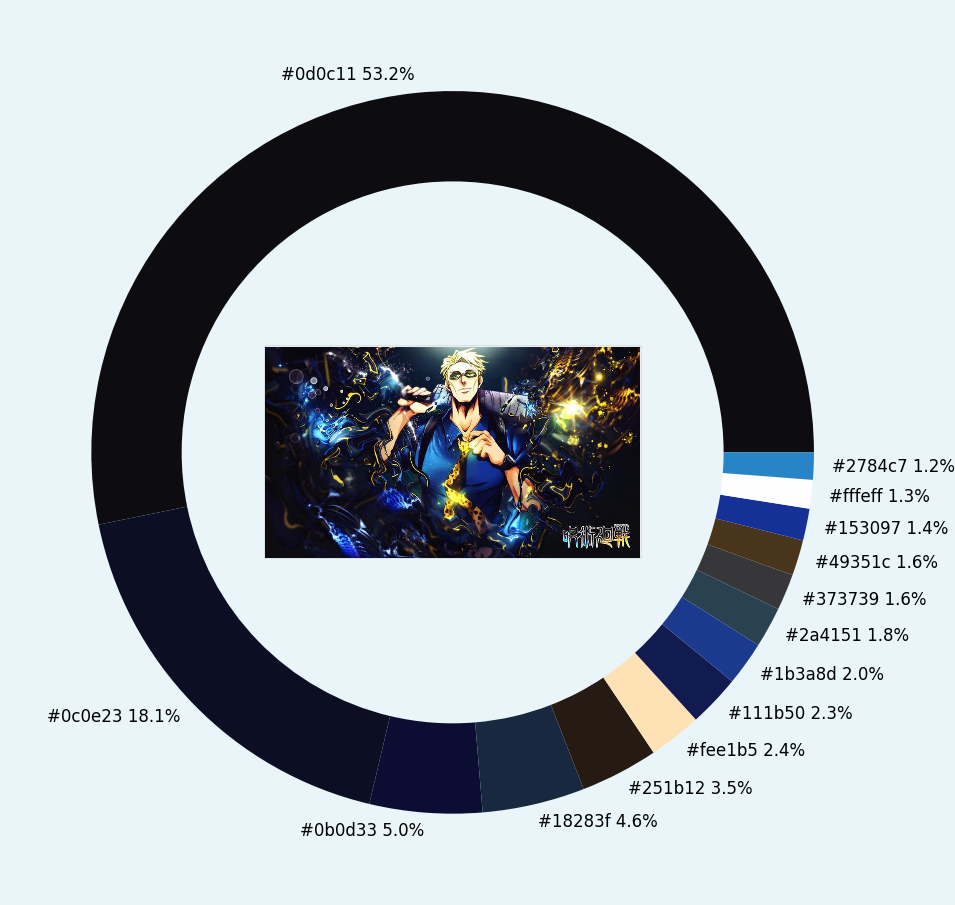

In [79]:
input_image='/content/myimgs/Images/nanami.jpg'
resizer(input_image)
df= color_to_df(input_image)
make_the_wheel(df, input_image)